# Gradient Descent versus Simulated Annealing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib import animation
%matplotlib inline

In [2]:
def f(x):
    return x ** 4 - x ** 3 - 20 * x ** 2 + 3 * x + 2

x_sym = sp.symbols('x_sym')
df = sp.diff(f(x_sym), x_sym)
df = sp.lambdify(x_sym, df)

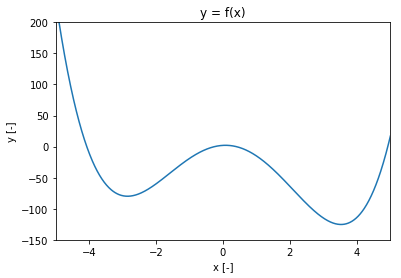

In [3]:
x = np.linspace(-5, 5, 1000)
y = f(x)
plt.plot(x, y)
plt.xlim([-5, 5])
plt.ylim([-150, 200])
plt.xlabel('x [-]')
plt.ylabel('y [-]')
plt.title('y = f(x)')
plt.show()

In [6]:
def GD(start, func, diff, steps=1000, learning_rate=0.001):
    path = [start]
    pos = start
    for i in range(steps):
        grad = diff(pos)
        pos = pos - learning_rate * grad
        path.append(pos)
        
    return np.array(path)

In [7]:
def SA(start, func, steps=1000, step_size=0.001):
    
    def acceptance(deltaE, temperature):
        if deltaE < 0:
            return 1
        else:
            return 1 / np.exp(deltaE / temperature)
        
    
    path = [start]
    s = start
    for k in range(steps):
        temperature = steps / (k + 1)
        
        s_new = s + np.sign(np.random.rand() - 0.5) * step_size
        deltaE = func(s_new) - func(s) 
        
        if acceptance(deltaE, temperature) > np.random.rand():
            s = s_new
            path.append(s)
            
    return np.array(path)

In [8]:
path_gd = GD(-4, f, df)

In [15]:
path_sa = SA(-4, f, steps=100000, step_size=0.1)

In [10]:
class plot:

    def __init__(self, func, path, title):
        self.x = np.linspace(-5, 5, 1000)
        self.y = func(self.x)
        self.path = path
        self.func = func
    
        self.fig = plt.figure()
        self.ax = plt.axes(xlim = (-5, 5), ylim=(-150, 200))
        self.points = self.ax.scatter([], [], c = 'r')
        self.curve = self.ax.plot(self.x, self.y)
        self.ax.set_xlabel('x [-]')
        self.ax.set_ylabel('y [-]')
        self.ax.set_title(title)
        
    def init(self):
        # curve = self.ax.plot(self.x, self.y, 'b')
        self.points.set_offsets([])
        return self.points,
    
    def animate(self, i):
        self.points.set_offsets([self.path[i], self.func(self.path[i])])
        return self.points,
    
    def render(self):
        return animation.FuncAnimation(self.fig, self.animate, init_func=self.init,
                                       frames=200, interval=20, blit=True)
        

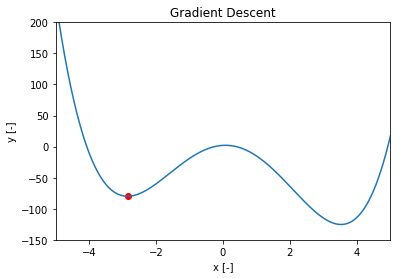

In [11]:
obj = plot(f, path_gd, 'Gradient Descent')
ani = obj.render()
ani.save('GDplot.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

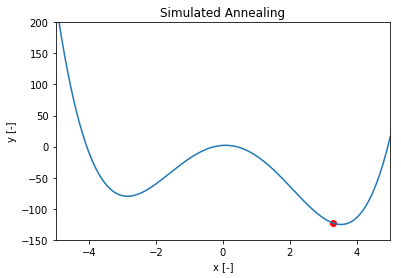

In [17]:
sample = path_sa[1 :: 250]
obj = plot(f, sample, 'Simulated Annealing')
ani = obj.render()
ani.save('SAplot.mp4', fps=30, extra_args=['-vcodec', 'libx264'])